In [1]:
# importing packages which going to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# to ignore Warnings

import warnings
warnings.filterwarnings('ignore')


#  Data Cleaning 

In [3]:
# Decoding the given 'companies.csv' file to load data in system.
companies = pd.read_csv('companies.csv',encoding='ISO-8859-1')
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
# decoding the given 'rounds2.csv' file to load data in system.
rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Understand the Data Set 

    1.)How many unique companies are present in rounds2?	

    2.)How many unique companies are present in companies?	                       

    3.)In the companies data frame, which column can be used as the unique key for each company? Write the name of the column. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	 

    4.)Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.          Name the merged frame master_frame. How many observations are present in master_frame?

In [5]:
# 1.) How many unique companies are present in rounds2?
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2['company_name'] = rounds2['company_permalink'].apply(lambda x:0 if x=="0" else str(x[14:]))
print(len(rounds2['company_name'].unique()))

# For confirming -
print("Unique companies are present in rounds2 are:",len(rounds2['company_name'].value_counts()))

66368
Unique companies are present in rounds2 are: 66368


In [6]:
# 2.) How many unique companies are present in companies?
companies['permalink'] = companies['permalink'].str.lower()
companies['company_name'] = companies['permalink'].apply(lambda x:0 if x=="0" else str(x[14:]))
print(len(companies['company_name'].unique()))

# For confirming -
companies['company_name'].describe()
print("Unique companies are present in rounds2 are:",len(companies['company_name'].value_counts()))

66368
Unique companies are present in rounds2 are: 66368


In [7]:
# 3.) Are there any companies in the rounds2 file which are not present in companies?
test1 = pd.DataFrame(companies.company_name.unique())
test2 = pd.DataFrame(rounds2.company_name.unique())
print(test1.equals(test2))

# For  Confirming-
print("companies in the rounds2 file which are present in companies:",len(test1.isin(test2)))

True
companies in the rounds2 file which are present in companies: 66368


In [8]:
# 4.) Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.
master_frame = pd.merge(rounds2, companies, on = 'company_name') # Naming the merged frame as master_frame
print(len(master_frame.company_name)) # checking its length
master_frame.head() # getting some visuals of dataframe

114949


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,-the-one-of-them-inc-,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-com,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


### Cleaning the Data

    1.) Inspecting Null Values
    2.) Dropping unnecessary columns
    3.) Dropping unnecessary rows

###  Inspecting Null Values
Checking the Null values present in the whole dataframe so that we can identify which column we should drop and which column we keep to work.

In [9]:
#  Inspecting the Null values :-
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
company_name                   0
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [10]:
#  Inspecting the Null values percentage :- 
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
company_name                0.00
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64


###  Dropping unnecessary columns
For **Sparks Funds**, we are mostly driving our analysis based on *funding round type, category, country etc.* Hence, so many columns present in the ***master_frame*** which are not necessary, we will drop those columns.

In [11]:
master_frame.head() #checking before droppping rows

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,-the-one-of-them-inc-,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-com,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [12]:
#  Dropping unnecessary columns
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url','state_code', 'region', 'city', 'founded_at','status','company_name'], axis = 1)
master_frame.head() # checking again after dropping

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN


In [13]:
# Inspecting the Null values percentage after dropping columns :-
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64


### Dropping unnecessary rows
For the remaining columns from ***master_frame*** dataframe, I saw that there are columns which still have null counts.
So, I have dropped those rows and inspect the dataframe again.

In [14]:
# a.) Dropping rows based on null columns
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() | master_frame['category_list'].isnull())]
master_frame

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
6,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,HKG
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
...,...,...,...,...,...,...
114942,/organization/zzzzapp-com,seed,7000.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV
114943,/organization/zzzzapp-com,seed,33149.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV
114944,/organization/zzzzapp-com,convertible_note,41313.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV
114945,/organization/zzzzapp-com,seed,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV


In [15]:
# b.) Percentage of remaining rows :-
print(100*(len(master_frame.index)/114949)) # we devided the length of master_frame (after cleaning the data) with its 
# original length (initial length of rows of data) to get the idea of value of retained data(remaining data).

77.01589400516751


In [16]:
# c.) To check the shape of dataframe after cleaning the data :-
master_frame.shape

(88529, 6)

#  Funding Type Analysis

### Retaining the rows with only four investment types.
**Spark Funds** wants to choose one of these four investment *types(venture, angel, seed, and private equity)* for each potential investment they will make. So let's observe how many funding types are present in ***master_frame*** and then retain the rows with above-mentioned investment types.

In [17]:
# Observing all the unique funding_round_type :-
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [18]:
# Retaining the rows with only those four investment types which we want to consider :-
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed') 
                            | (master_frame['funding_round_type'] == 'angel') 
                            | (master_frame['funding_round_type'] == 'private_equity')]
master_frame.head() # to check the data in dataframe

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [19]:
# Calculating average investment amount for each of the four funding types.
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2)

funding_round_type
angel               971573.89
private_equity    73938486.28
seed                747793.68
venture           11724222.69
Name: raised_amount_usd, dtype: float64

In [20]:
# Retaining rows with only venture type. 
# As, Venture have the highest count in funding round.
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] #choosing only venture types. 
master_frame.head() # checking dataframe after alterations.

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA


In [21]:
#Dropping the column 'funding_round_type' as we are going to work with venture type only, from this point forward.
master_frame = master_frame.drop(['funding_round_type'], axis = 1)
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,10000000.0,#fame,Media,IND
4,/organization/0-6-com,2000000.0,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,1700000.0,H2O.ai,Analytics,USA


#  Country Analysis

###  Analysing the countries based on investment amount

Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [22]:
# Identify the top three English-speaking countries in the data frame top9.
pd.options.display.float_format = '{:.2f}'.format # to see the values till end.
top9 =round(master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum'),2) # 
# rounding decimal values to 2 digits. 
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False) 
# to sort the resulted data into descending order by values
top9 = top9.iloc[:9, ] # to get the data of top 9 countries 
top9.head() # looking the dataframe.

,raised_amount_usd
country_code,
USA,420068029342.00
CHN,39338918773.00
GBR,20072813004.00
IND,14261508718.00
CAN,9482217668.00


In [23]:
# Filtering rows on USA, GBR and IND as country_codes.
#As SparksFunds wants to invest in only top three English speaking countries.
master_frame = master_frame[(master_frame['country_code'] == 'USA') 
                            | (master_frame['country_code'] == 'GBR') 
                            | (master_frame['country_code'] == 'IND')]

master_frame.head() # to look into dataframe

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,10000000.00,#fame,Media,IND
10,/organization/0xdata,20000000.00,H2O.ai,Analytics,USA
11,/organization/0xdata,1700000.00,H2O.ai,Analytics,USA
12,/organization/0xdata,8900000.00,H2O.ai,Analytics,USA
22,/organization/1-mainstream,5000000.00,1 Mainstream,Apps|Cable|Distribution|Software,USA


#  Sector Analysis 1

### Extract the primary sector of each category
 Extract the primary sector value into category_list column. According to the business rule the first string before the vertical bar will be considered the primary sector.

In [24]:
#Extracting the primary sector value from category list column
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0]) 
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,10000000.00,#fame,Media,IND
10,/organization/0xdata,20000000.00,H2O.ai,Analytics,USA
11,/organization/0xdata,1700000.00,H2O.ai,Analytics,USA
12,/organization/0xdata,8900000.00,H2O.ai,Analytics,USA
22,/organization/1-mainstream,5000000.00,1 Mainstream,Apps,USA


### Map each primary sector to one of the eight main sectors
Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [25]:
#Reading mapping.csv file 
mapping = pd.read_csv('mapping.csv')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True) #replacing values to make it useful.
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [26]:
#Reshaping the mapping dataframe to merge with the master_frame dataframe. Using melt() function to unpivot the table.
mapping = pd.melt(mapping, id_vars =['category_list'], 
                  value_vars =['Manufacturing','Automotive & Sports', 'Cleantech / Semiconductors',
                               'Entertainment','Health','News, Search and Messaging','Others',
                               'Social, Finance, Analytics, Advertising'])

In [27]:
# removing entites with null values
mapping = mapping[~(mapping.value == 0)] 

In [28]:
# dropping value column as all the rows have same (1) as their column. so, we dont need it anymore. 
mapping = mapping.drop('value', axis = 1)
mapping

,category_list,variable
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing
...,...,...
5433,Social Recruiting,"Social, Finance, Analytics, Advertising"
5434,Social Television,"Social, Finance, Analytics, Advertising"
5435,Social Travel,"Social, Finance, Analytics, Advertising"
5446,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [29]:
# naming column with recognisable name as main sector.
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing
...,...,...
5433,Social Recruiting,"Social, Finance, Analytics, Advertising"
5434,Social Television,"Social, Finance, Analytics, Advertising"
5435,Social Travel,"Social, Finance, Analytics, Advertising"
5446,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [30]:
# merging mapping dataframe with master_frame to add data to it. and to use them as whole.
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,10000000.00,#fame,Media,IND,Entertainment
1,/organization/0xdata,20000000.00,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,1700000.00,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,8900000.00,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,5000000.00,1 Mainstream,Apps,USA,"News, Search and Messaging"


In [31]:
#Listing out those rows which have no main sectors in the master_frame.
print(master_frame[master_frame.main_sector.isnull()].category_list.unique())

['Nanotechnology' 'Natural Gas Uses' 'Natural Language Processing'
 'Enterprise 2.0' 'Adaptive Equipment' 'Racing' 'Specialty Retail'
 'Biotechnology and Semiconductor' 'Rapidly Expanding' 'Navigation'
 'Product Search' 'GreenTech' 'Retirement']


In [32]:
#Identifying number of rows with NaN value in main_sector.
len(master_frame[master_frame.main_sector.isnull()])

165

In [33]:
# filtering the rows which have main_sector from NaN or null values.
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index) # checking length of data frame.

38638

In [34]:
# checking all 8 main sectors and their number of entites in main_frame.
print(master_frame.main_sector.value_counts())

Others                                     9110
Cleantech / Semiconductors                 8348
Social, Finance, Analytics, Advertising    7814
News, Search and Messaging                 4721
Health                                     3429
Manufacturing                              2630
Entertainment                              2006
Automotive & Sports                         580
Name: main_sector, dtype: int64


# Sector Analysis 2
### Create Data-Frames D1, D2, D3  for three different countries

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

All the columns of the master_frame along with the primary sector and the main sector

The total number (or count) of investments for each main sector in a separate column

The total amount invested in each main sector in a separate column

In [35]:
# making D1 dataframe containing data specifically regarding USA for the ranged "raised amount".
D1 = master_frame[(master_frame['country_code'] == 'USA') 
                  & (master_frame['raised_amount_usd'] >= 5000000) 
                  & (master_frame['raised_amount_usd'] <= 15000000)]
D1.describe() # to get the basic value check on the varibles.

,raised_amount_usd
count,12012.00
mean,8934256.97
std,3075071.25
min,5000000.00
25%,6012337.25
50%,8304890.00
75%,11000000.00
max,15000000.00


<AxesSubplot:>

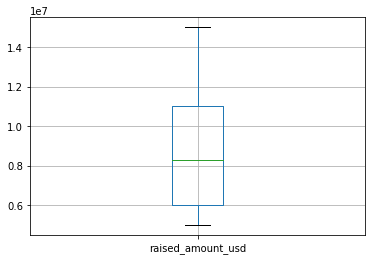

In [36]:
# To get known about the outliers.
D1.boxplot()

In [37]:
# making a saprate dataframe for main_sector to get known the invested money in each sector and the total counts.
D1_FT = D1[['raised_amount_usd','main_sector']] # taking 2 variable for data frame
D1_FT

,raised_amount_usd,main_sector
3,8900000.00,"Social, Finance, Analytics, Advertising"
4,5000000.00,"News, Search and Messaging"
17,11999347.00,Others
20,15000000.00,Manufacturing
21,5000000.00,Manufacturing
...,...,...
38791,15000000.00,"Social, Finance, Analytics, Advertising"
38794,5026000.00,"Social, Finance, Analytics, Advertising"
38798,12000000.00,Cleantech / Semiconductors
38799,14219999.00,Cleantech / Semiconductors


In [38]:
# grouping rows by unique main sectors
D1_FT = D1_FT.groupby('main_sector')

In [39]:
# getting values of total amount and total count on raised amount in each sector.
D1_FT = D1_FT.agg(['sum', 'count']).rename(columns={'sum':'Total_amount','count' : 'Total_count'})
D1_FT

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                         1454104361.00         167
Cleantech / Semiconductors                 21206628192.00        2300
Entertainment                               5099197982.00         591
Health                                      8211859357.00         909
Manufacturing                               7258553378.00         799
News, Search and Messaging                 13959567428.00        1582
Others                                     26321007002.00        2950
Social, Finance, Analytics, Advertising    23807376964.00        2714

In [40]:
# merging "D1_FT" with "D1" to add extra information to our main database based on main sector. 
D1 = D1.merge(D1_FT, how='left', on ='main_sector')
D1.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/0xdata,8900000.00,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",23807376964.00,2714
1,/organization/1-mainstream,5000000.00,1 Mainstream,Apps,USA,"News, Search and Messaging",13959567428.00,1582
2,/organization/128-technology,11999347.00,128 Technology,Service Providers,USA,Others,26321007002.00,2950
3,/organization/1366-technologies,15000000.00,1366 Technologies,Manufacturing,USA,Manufacturing,7258553378.00,799
4,/organization/1366-technologies,5000000.00,1366 Technologies,Manufacturing,USA,Manufacturing,7258553378.00,799


In [41]:
# similarly for D2 as we did for D1.
# making dataframe containing data specifically about GBR, for the defined raised amount range.
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]

D2.describe()

,raised_amount_usd
count,619.00
mean,8667573.99
std,2870090.64
min,5000000.00
25%,6082165.00
50%,8000000.00
75%,10653380.00
max,15000000.00


<AxesSubplot:>

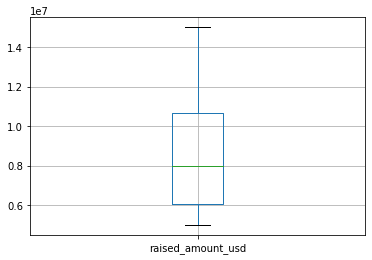

In [42]:
# To get known about the outliers.
D2.boxplot()

In [43]:
D2_FT = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D2 = D2.merge(D2_FT, how='left', on ='main_sector')
D2.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/365scores,5500000.00,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",1089404014.00,133
1,/organization/7digital,8468328.00,7digital,Content Creators,GBR,Entertainment,482784687.00,56
2,/organization/7digital,10000000.00,7digital,Content Creators,GBR,Entertainment,482784687.00,56
3,/organization/90min,15000000.00,90min,Media,GBR,Entertainment,482784687.00,56
4,/organization/90min,5800000.00,90min,Media,GBR,Entertainment,482784687.00,56


In [44]:
# same as for D3
# making dataframe containing data specifically about IND, for the defined raised amount range.
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]

D3.describe()

,raised_amount_usd
count,328.00
mean,8992510.98
std,3219811.35
min,5000000.00
25%,6000000.00
50%,8700000.00
75%,10555000.00
max,15000000.00


<AxesSubplot:>

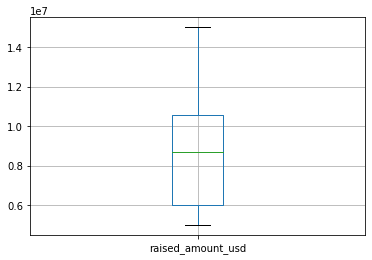

In [45]:
# To get known about the outliers.
D3.boxplot()

In [46]:
D3_FT = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})

D3 = D3.merge(D3_FT, how='left', on ='main_sector')
D3.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,10000000.00,#fame,Media,IND,Entertainment,280830000.00,33
1,/organization/21diamonds-india,6369507.00,21Diamonds,E-Commerce,IND,Others,1013409507.00,110
2,/organization/a-little-world,6410000.00,A LITTLE WORLD,Finance,IND,"Social, Finance, Analytics, Advertising",550549550.00,60
3,/organization/adlabs-imagica,8180000.00,Adlabs Imagica,Entertainment,IND,Entertainment,280830000.00,33
4,/organization/agile,5740000.00,Agile,Finance,IND,"Social, Finance, Analytics, Advertising",550549550.00,60


### Sector-wise Investment Analysis For D1, D2, D3 
Analyse the below points :

In [47]:
#Total number of investments (total count)
print("Total number of investments(count) in USA:",D1.raised_amount_usd.count())
print("Total number of investments(count) in GBR:",D2.raised_amount_usd.count())
print("Total number of investments(count) in IND:",D3.raised_amount_usd.count())

Total number of investments(count) in USA: 12012
Total number of investments(count) in GBR: 619
Total number of investments(count) in IND: 328


In [48]:
#Total amount of investment (total amount) 
print("Total amount of investment in USA: $", round(D1.raised_amount_usd.sum(), 2))
print("Total amount of investment in GBR: $",round(D2.raised_amount_usd.sum(), 2))
print("Total amount of investment in IND: $",round(D3.raised_amount_usd.sum(), 2))

Total amount of investment in USA: $ 107318294664.0
Total amount of investment in GBR: $ 5365228300.0
Total amount of investment in IND: $ 2949543602.0


In [49]:
# Looking into D1_FT dataframe
#to get known about Top sector, second-top, third-top sector for D1 dataframe (based on count of investments)
#and Number of investments in the top, second-top, third-top sector in D1 dataframe.
D1_FT

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                         1454104361.00         167
Cleantech / Semiconductors                 21206628192.00        2300
Entertainment                               5099197982.00         591
Health                                      8211859357.00         909
Manufacturing                               7258553378.00         799
News, Search and Messaging                 13959567428.00        1582
Others                                     26321007002.00        2950
Social, Finance, Analytics, Advertising    23807376964.00        2714

In [50]:
# Looking into D2_FT dataframe
#to get known about Top sector, second-top, third-top for D2 dataframe (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D2 dataframe.
D2_FT

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                          167051565.00          16
Cleantech / Semiconductors                  1150139665.00         128
Entertainment                                482784687.00          56
Health                                       214537510.00          24
Manufacturing                                361940335.00          42
News, Search and Messaging                   615746235.00          73
Others                                      1283624289.00         147
Social, Finance, Analytics, Advertising     1089404014.00         133

In [51]:
# Looking into D3_FT dataframe
#to get known about Top sector, second-top, third-top for D2 dataframe (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D3 dataframe.
D3_FT

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                          136900000.00          13
Cleantech / Semiconductors                   165380000.00          20
Entertainment                                280830000.00          33
Health                                       167740000.00          19
Manufacturing                                200900000.00          21
News, Search and Messaging                   433834545.00          52
Others                                      1013409507.00         110
Social, Finance, Analytics, Advertising      550549550.00          60

In [52]:
#For the top sector in USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head(1) # to see only the top one entity.

,raised_amount_usd
company_permalink,
/organization/virtustream,64300000.00


In [53]:
#For the second top sector in USA , which company received the highest investment?
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head(1)

,raised_amount_usd
company_permalink,
/organization/shotspotter,67933006.00


In [54]:
#For the top sector in GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head(1)

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37000000.00


In [55]:
#For the second top sector in GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head(1)

,raised_amount_usd
company_permalink,
/organization/celltick-technologies,37500000.00


In [56]:
#For the top sector in IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head(1)

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39000000.00


In [59]:
#For the second top sector in IND , which company received the highest investment?
company = D3[D3['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head(1) # to see only the top entity. 

,raised_amount_usd
company_permalink,
/organization/gupshup-technology-india-pvt-ltd,33000000.00


# Analysis Result :
#### Based on the data analysis performed, SparksFunds should invest in -

Funding type - **Venture**.

Countries - **USA**, **Britain** & **India** respectively.

Top two sectors to invest, are - **Others** & **Social, Finance, Analytics, Advertising**.